<a href="https://colab.research.google.com/github/Gnani0825/Gnaneshwar_INFO5731_Fall2024/blob/main/Pendyala_Gnaneshwar_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [38]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report






In [40]:

import pandas as pd
from google.colab import files
print("Upload the training file :")
uploaded_train = files.upload()

print("Upload the testing file :")
uploaded_test = files.upload()
train_file_name = list(uploaded_train.keys())[0]
test_file_name = list(uploaded_test.keys())[0]
train_data = pd.read_csv(train_file_name, header=None, names=["label", "review"], delimiter='\t')
test_data = pd.read_csv(test_file_name, header=None, names=["label", "review"], delimiter='\t')
print("Training Data Sample:")
print(train_data.head())
print("Test Data Sample:")
print(test_data.head())


Upload the training file :


Saving stsa-train.txt to stsa-train (1).txt
Upload the testing file :


Saving stsa-test.txt to stsa-test (1).txt
Training Data Sample:
                                               label  review
0  1 a stirring , funny and finally transporting ...     NaN
1  0 apparently reassembled from the cutting-room...     NaN
2  0 they presume their audience wo n't sit still...     NaN
3  1 this is a visually stunning rumination on lo...     NaN
4  1 jonathan parker 's bartleby should have been...     NaN
Test Data Sample:
                                               label  review
0   0 no movement , no yuks , not much of anything .     NaN
1  0 a gob of drivel so sickly sweet , even the e...     NaN
2  0 gangs of new york is an unapologetic mess , ...     NaN
3  0 we never really feel involved with the story...     NaN
4          1 this is one of polanski 's best films .     NaN


In [41]:

def process_data(file_name):
    data = []
    with open(file_name, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.split(maxsplit=1)
            if len(parts) == 2:
                label, review = parts
                data.append((int(label), review.strip()))
    return pd.DataFrame(data, columns=["label", "review"])
train_data = process_data(train_file_name)
test_data = process_data(test_file_name)
print("Training Data Sample:")
print(train_data.head())

print("Test Data Sample:")
print(test_data.head())


Training Data Sample:
   label                                             review
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...
Test Data Sample:
   label                                             review
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .


In [42]:

import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)

    test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)

    return train_data, test_data

#data processing

def clean_text(review, stopword):
    wl = WordNetLemmatizer()
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)

def preprocess_data(train_data, test_data):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stopword = stopwords.words('english')

    train_data['clean_reviews'] = train_data['reviews'].apply(clean_text, args=(stopword,))
    test_data['clean_reviews'] = test_data['reviews'].apply(clean_text, args=(stopword,))

    label_encoder = LabelEncoder()
    train_data['sentiment'] = label_encoder.fit_transform(train_data['sentiment'])
    test_data['sentiment'] = label_encoder.transform(test_data['sentiment'])

    return train_data, test_data

def tfidf_vectorization(train_data, test_data):
    tfidf_vect = TfidfVectorizer()
    X_tfidf = tfidf_vect.fit_transform(train_data['clean_reviews'])
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

    X_test_tfidf = tfidf_vect.transform(test_data['clean_reviews'])

    return X_tfidf_df, X_test_tfidf

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=10):
    print("Model: ", type(model).__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    print('Accuracy: {:.2f}%'.format(accuracy))
    print(classification_report(y_test, y_pred))

    scores = cross_val_score(model, X_test, y_test, cv=cv)
    print("Cross-Validation Mean Score: {:.2f}%".format(scores.mean() * 100))
    print("\n")

if __name__ == "__main__":
    train_file = 'stsa-train.txt'
    test_file = 'stsa-test.txt'

    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)
    X_tfidf_df, X_test_tfidf = tfidf_vectorization(train_data, test_data)

    models = [MultinomialNB(fit_prior=False), LinearSVC(), KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
              DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]                         #Models List

    for model in models:
        evaluate_model(model, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model:  MultinomialNB


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Accuracy: 81.05%
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       912
           1       0.78      0.86      0.82       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821

Cross-Validation Mean Score: 72.32%


Model:  LinearSVC


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Accuracy: 79.63%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score: 70.95%


Model:  KNeighborsClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 50.85%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.85      0.02      0.04       909

    accuracy                           0.51      1821
   macro avg       0.68      0.51      0.35      1821
weighted avg       0.68      0.51      0.35      1821

Cross-Validation Mean Score: 52.71%


Model:  DecisionTreeClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 65.90%
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       912
           1       0.67      0.62      0.65       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821

Cross-Validation Mean Score: 61.84%


Model:  RandomForestClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 74.68%
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       912
           1       0.76      0.73      0.74       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Cross-Validation Mean Score: 66.23%


Model:  XGBClassifier
Accuracy: 49.86%
              precision    recall  f1-score   support

           0       0.50      0.99      0.67       912
           1       0.17      0.00      0.00       909

    accuracy                           0.50      1821
   macro avg       0.33      0.50      0.33      1821
weighted avg       0.33      0.50      0.33      1821

Cross-Validation Mean Score: 65.96%




In [43]:
import gensim
from gensim.models import Word2Vec
from sklearn.ensemble import GradientBoostingClassifier
from transformers import BertTokenizer, BertModel
import torch
from torch.nn.functional import softmax

# Word2Vec Implementation
def train_word2vec(train_data, vector_size=100, window=5, min_count=2, workers=4):
    tokenized_rev = [review.split() for review in train_data['clean_reviews']]
    word2vec_model = Word2Vec(sentences=tokenized_rev, vector_size=vector_size, window=window,
                              min_count=min_count, workers=workers)
    return word2vec_model

def create_word2vec_features(word2vec_model, tokenized_rev, vector_size=100):
    def average_word_vectors(tokens):
        word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
        if len(word_vectors) > 0:
            return sum(word_vectors) / len(word_vectors)
        else:
            return [0] * vector_size

    features = [average_word_vectors(review.split()) for review in tokenized_rev]
    return pd.DataFrame(features)

# BERT Implementation
def encode_with_bert(reviews, model, tokenizer, max_length=512):
    inputs = tokenizer(list(reviews), return_tensors="pt", truncation=True, padding=True, max_length=max_length)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Take mean of token embeddings
    return embeddings.numpy()

def bert_vectorization(train_data, test_data):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    X_train_bert = encode_with_bert(train_data['clean_reviews'], model, tokenizer)
    X_test_bert = encode_with_bert(test_data['clean_reviews'], model, tokenizer)

    return X_train_bert, X_test_bert
if __name__ == "__main__":
    train_file = 'stsa-train.txt'
    test_file = 'stsa-test.txt'
    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)

    # Word2Vec
    word2vec_model = train_word2vec(train_data)
    X_train_w2v = create_word2vec_features(word2vec_model, train_data['clean_reviews'])
    X_test_w2v = create_word2vec_features(word2vec_model, test_data['clean_reviews'])

    # Train and evaluate a model with Word2Vec features
    print("\nUsing Word2Vec Features:")
    rf_model = RandomForestClassifier()
    evaluate_model(rf_model, X_train_w2v, train_data['sentiment'], X_test_w2v, test_data['sentiment'])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Using Word2Vec Features:
Model:  RandomForestClassifier
Accuracy: 54.26%
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       912
           1       0.54      0.62      0.57       909

    accuracy                           0.54      1821
   macro avg       0.54      0.54      0.54      1821
weighted avg       0.54      0.54      0.54      1821

Cross-Validation Mean Score: 53.71%




## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile.csv


In [44]:
# Write your code here
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

load_dt = pd.read_csv('Amazon_Unlocked_Mobile.csv')
load_dt

print("Shape: {0}".format(load_dt.shape))
clus_df = load_dt.head(150)
clus_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape: (413840, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
145,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,3,the charger did not work. My parents started u...,0.0
146,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,5,Have a family member who has ZERO interest in ...,1.0
147,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,5,good quality phone,0.0
148,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,2,does not work well with T-Mobile. T-Mobile clo...,1.0


In [45]:
import nltk
nltk.download('punkt_tab')
clus_df['After noise removal'] = clus_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
clus_df['Punctuation removal'] = clus_df['After noise removal'].str.replace('[^\w\s]','')
clus_df['Remove numbers'] = clus_df['Punctuation removal'].str.replace('\d+', '')
stop_word = stopwords.words('english')
clus_df['Stopwords removal'] = clus_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
clus_df['Lower casing'] = clus_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
clus_df['Tokenization'] = clus_df['Lower casing'].apply(lambda x: TextBlob(x).words)
st = PorterStemmer()
clus_df['Stemming'] = clus_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))
clus_df['Lemmatization'] = clus_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
clus_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-45-c5ca687662b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['After noise removal'] = clus_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
<ipython-input-45-c5ca687662b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['Punctuation removal'] = clus_df['After noise removal'].str.replace('[^\w\s]','')
<ipyth

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,3,the charger did not work. My parents started u...,0.0,the charger did not work My parents started u...,the charger did not work My parents started u...,the charger did not work My parents started u...,charger work My parents started using cable di...,charger work my parents started using cable di...,"[charger, work, my, parents, started, using, c...",charger work my parent start use cabl directli...,charger work my parent start use cabl directli...
146,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,5,Have a family member who has ZERO interest in ...,1.0,Have a family member who has ZERO interest in ...,Have a family member who has ZERO interest in ...,Have a family member who has ZERO interest in ...,Have family member ZERO interest learning anyt...,have family member zero interest learning anyt...,"[have, family, member, zero, interest, learnin...",have famili member zero interest learn anyth t...,have famili member zero interest learn anyth t...
147,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,5,good quality phone,0.0,good quality phone,good quality phone,good quality phone,good quality phone,good quality phone,"[good, quality, phone]",good qualiti phone,good qualiti phone
148,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,2,does not work well with T-Mobile. T-Mobile clo...,1.0,does not work well with T Mobile T Mobil

In [46]:
#kmeans clustering
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ve = TfidfVectorizer()
tfidf = tfidf_ve.fit_transform(clus_df['Lemmatization'].values)
tfidf.shape

from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters=15, random_state=150)
model_tf.fit(tfidf)

labels_tf = model_tf.labels_
cluster_tf=model_tf.cluster_centers_
cluster_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02210216, 0.        , ..., 0.03474062, 0.        ,
        0.        ],
       [0.        , 0.00551164, 0.        , ..., 0.        , 0.01172601,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06954833, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [47]:
terms1 = tfidf_ve.get_feature_names_out()
terms1[1:10]

array(['100', '1080p', '110', '12', '16', '1700', '18', '1900', '1999'],
      dtype=object)

In [48]:
df1 = clus_df
df1['Tfidf Cluster Label'] = model_tf.labels_
df1.head(5)

df1.groupby(['Tfidf Cluster Label'])['Reviews'].count()

<ipython-input-48-0bd1e6b2dc3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Cluster Label'] = model_tf.labels_


,Reviews
Tfidf Cluster Label,
0,3
1,12
2,19
3,7
4,17
5,8
6,2
7,21
8,8


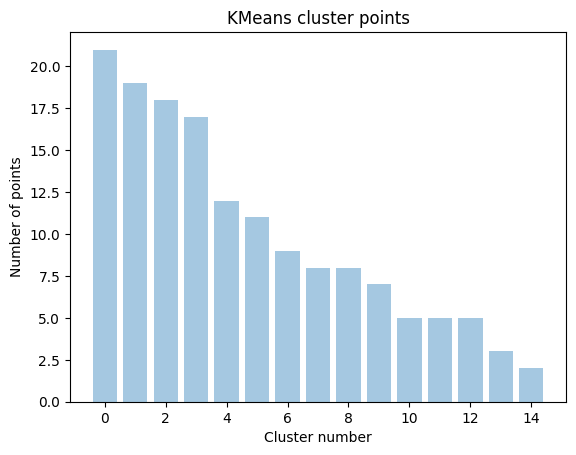

4 reviews assigned to cluster  0
----------------------------------------------------------------------
muy buen producto


______________________________________________________________________
4 reviews assigned to cluster  1
----------------------------------------------------------------------
excellent product in perfect condition


Nokia is the brand that can be used in telephone, good price, excellent team, was a gift to my daughter and she liked it, easy to use and very affordable price, I recommend it.


very good, excellent


______________________________________________________________________
4 reviews assigned to cluster  2
----------------------------------------------------------------------
I already had a phone with problems... I know it stated it was used, but dang, it did not state that it did not charge. I wish I would have read these comments then I would have not purchased this item.... and its cracked on the side.. damaged goods is what it is.... If trying to ch

In [22]:
import matplotlib.pyplot as plt

cluster_counts = df1['Tfidf Cluster Label'].value_counts()
x_range = range(len(cluster_counts))
plt.bar(x_range, cluster_counts, alpha=0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

for i in range(10):
    print("4 reviews assigned to cluster ", i)
    print("-" * 70)
    group_indices = df1.groupby(['Tfidf Clus Label']).groups.get(i, [])
    if len(group_indices) > 0:
        print(df1.iloc[group_indices[0]]['Reviews'])
        print('\n')
    if len(group_indices) > 5:
        print(df1.iloc[group_indices[5]]['Reviews'])
        print('\n')
    if len(group_indices) > 10:
        print(df1.iloc[group_indices[10]]['Reviews'])
        print('\n')
    print("_" * 70)



Silhouette Score: 0.19789878494986504


<ipython-input-49-7d7e4b414c34>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['Bow Clus Label'] = kmeans_model.labels_
<ipython-input-49-7d7e4b414c34>:32: RuntimeWarning: invalid value encountered in divide
  sent_vec /= cnt_words
<ipython-input-49-7d7e4b414c34>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['AVG-W2V '] = model.labels_


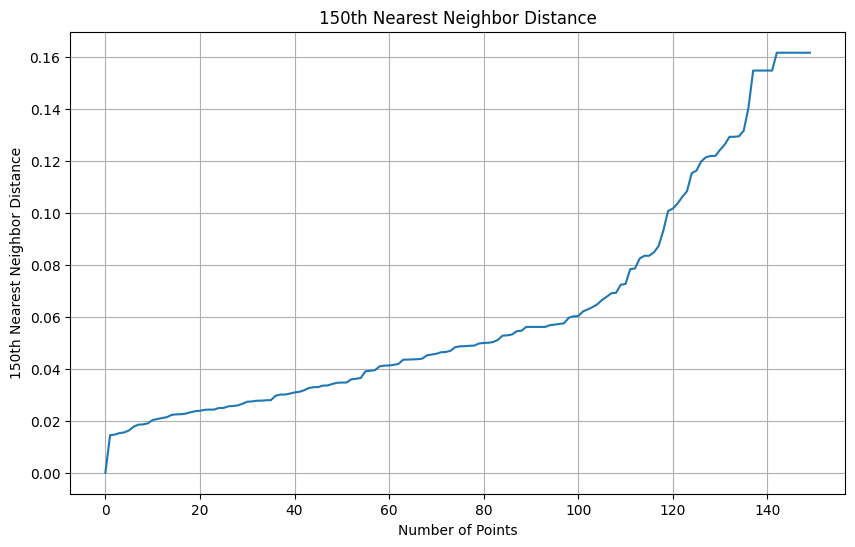

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import gensim
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clus_df['Reviews'].values)
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(bow)
labels = kmeans_model.labels_
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
print("Silhouette Score:", silhouette_score)
clus_df['Bow Clus Label'] = kmeans_model.labels_
list_of_sent_train = [sentence.split() for sentence in clus_df["Lower casing"].values]
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

sent_vectors = []
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except KeyError:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.nan_to_num(sent_vectors)
minPts = 2 * 150
model = DBSCAN(eps=5, min_samples=minPts, n_jobs=-1)
model.fit(sent_vectors)
clus_df['AVG-W2V '] = model.labels_
distances = pairwise_distances(sent_vectors)
sorted_distances = np.sort(distances, axis=0)
if len(sorted_distances[0]) > 99:
    twohundredth_nearest_distances = sorted_distances[:, 99]
else:
    print("Number of data points is less than 100, cannot compute 100th nearest neighbor distance.")
if len(twohundredth_nearest_distances) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(twohundredth_nearest_distances)
    plt.title("150th Nearest Neighbor Distance")
    plt.xlabel("Number of Points")
    plt.ylabel("150th Nearest Neighbor Distance")
    plt.grid(True)
    plt.show()



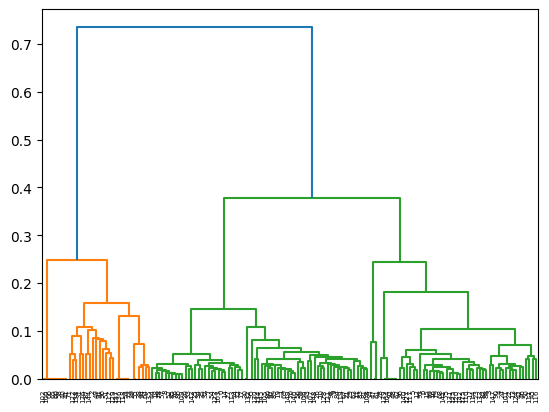

In [50]:
#Hierarchial Clustering
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 1000)

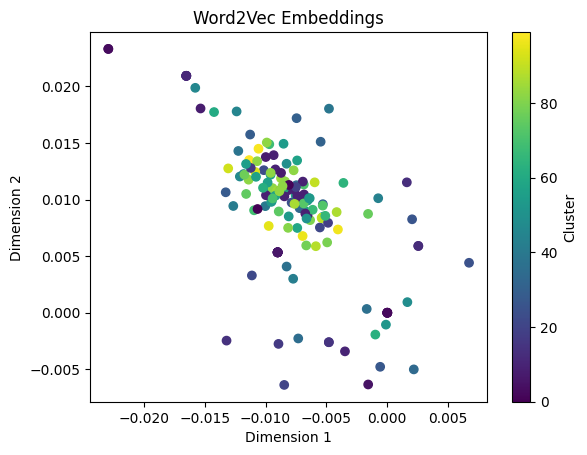

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=100)       #perform clustering using KMeans
kmeans.fit(sent_vectors)
clusters = kmeans.predict(sent_vectors)
plt.scatter(sent_vectors[:, 0], sent_vectors[:, 1], c=clusters, cmap='viridis')
plt.title('Word2Vec Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




In [65]:


subset_reviews = [:2000]  # Subset of reviews
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_ve.fit_transform(subset_reviews)

# K-means Clustering
kmeans = KMeans(n_clusters=5, max_iter=100, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# Evaluate K-means
silhouette_kmeans = silhouette_score(tfidf_matrix, kmeans_labels)
print(f"TF-IDF K-means Silhouette Score: {silhouette_kmeans}")

# Dimensionality reduction with TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
tfidf_2d = svd.fit_transform(tfidf_matrix)

# Visualize Clustering
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("TF-IDF K-means Clustering")
plt.show()


TypeError: 'function' object is not subscriptable

Word2Vec K-means Silhouette Score: 0.04388114809989929


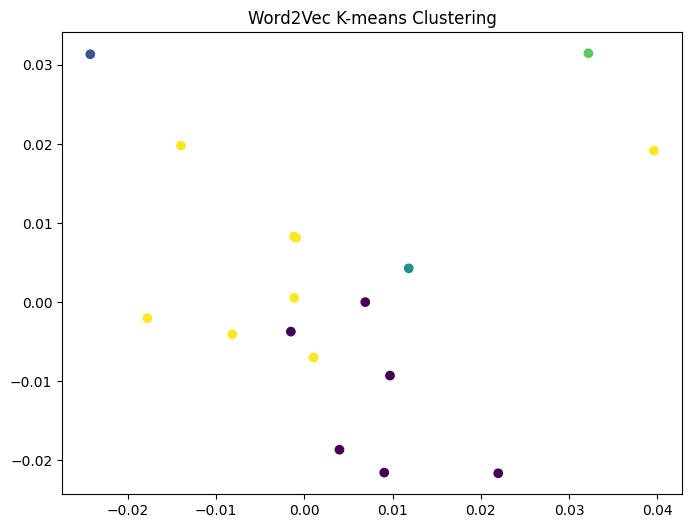

In [60]:
from gensim.models import Word2Vec
import numpy as np

# Generate Word2Vec embeddings
sentences = [review.split() for review in subset_reviews]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv

# Create sentence vectors by averaging word embeddings
sentence_vectors = []
for sentence in sentences:
    vector = np.mean([word_vectors[word] for word in sentence if word in word_vectors], axis=0)
    sentence_vectors.append(vector if isinstance(vector, np.ndarray) else np.zeros(100))

# K-means Clustering on Word2Vec
kmeans_w2v = KMeans(n_clusters=5, max_iter=100, random_state=42)
kmeans_w2v_labels = kmeans_w2v.fit_predict(sentence_vectors)

# Evaluate K-means on Word2Vec
silhouette_w2v = silhouette_score(sentence_vectors, kmeans_w2v_labels)
print(f"Word2Vec K-means Silhouette Score: {silhouette_w2v}")

# Visualize Word2Vec Clustering
w2v_2d = svd.fit_transform(sentence_vectors)
plt.figure(figsize=(8, 6))
plt.scatter(w2v_2d[:, 0], w2v_2d[:, 1], c=kmeans_w2v_labels, cmap='viridis')
plt.title("Word2Vec K-means Clustering")
plt.show()


In [61]:
from sentence_transformers import SentenceTransformer

# Generate BERT embeddings
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
bert_embeddings = bert_model.encode(subset_reviews.tolist(), show_progress_bar=True)

# K-means Clustering on BERT
kmeans_bert = KMeans(n_clusters=5, max_iter=100, random_state=42)
kmeans_bert_labels = kmeans_bert.fit_predict(bert_embeddings)

# Evaluate K-means on BERT
silhouette_bert = silhouette_score(bert_embeddings, kmeans_bert_labels)
print(f"BERT K-means Silhouette Score: {silhouette_bert}")

# Visualize BERT Clustering
bert_2d = svd.fit_transform(bert_embeddings)
plt.figure(figsize=(8, 6))
plt.scatter(bert_2d[:, 0], bert_2d[:, 1], c=kmeans_bert_labels, cmap='viridis')
plt.title("BERT K-means Clustering")
plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


AttributeError: 'DataFrame' object has no attribute 'tolist'

DBSCAN Number of Clusters: 0


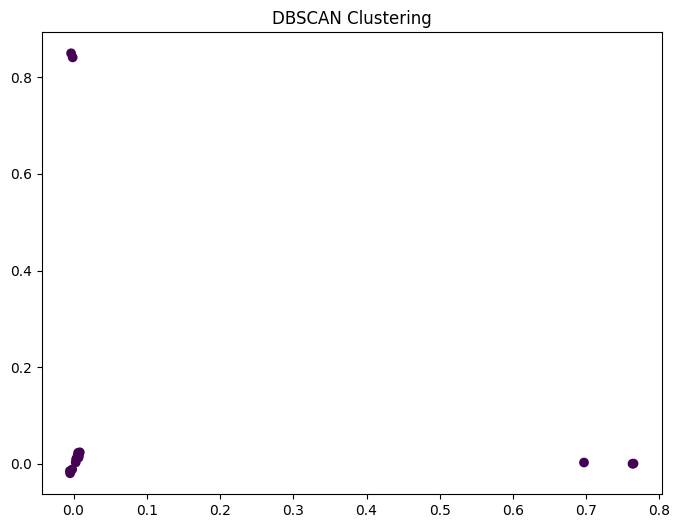

In [62]:
from sklearn.cluster import DBSCAN

# DBSCAN on TF-IDF
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

# Number of clusters
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN Number of Clusters: {num_clusters}")

# Visualize DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


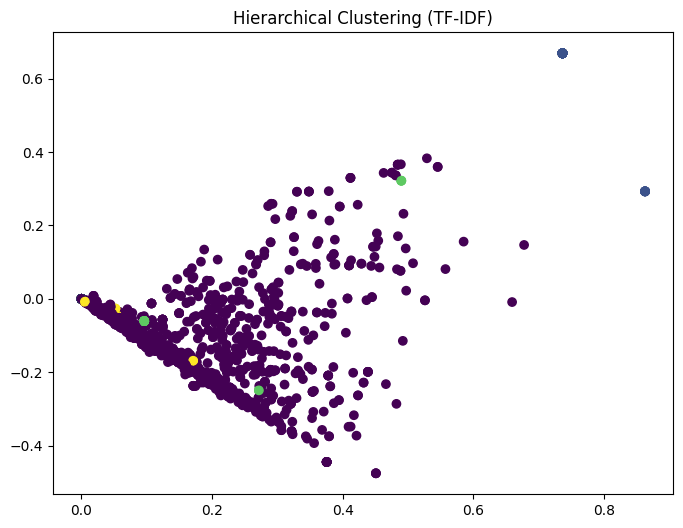

In [35]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering on TF-IDF
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(tfidf_matrix.toarray())

# Visualize Hierarchical Clustering
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering (TF-IDF)")
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
it is a time taking to understand the concepts related to this exercise,overall this exercise helped me to know about the topics related to clustering





'''